# How to Tutor CoPilot

**Author: Rose E Wang (rewang@cs.stanford.edu); https://cs.stanford.edu/~rewang**

Welcome! This tutorial will guide you through the setup and implementation of Tutor CoPilot.

The accompanying video for this tutorial can be found here: https://youtu.be/vV0jXEs4hdw.


## What is Tutor CoPilot?

Tutor CoPilot is a thought partner in live interactions.
It’s designed for situations where an educator, doctor, or lawyer leads a conversation—helping a student, diagnosing a patient, or interviewing a client, for example.
These are high-stakes settings where expertise matters, yet novices often face tricky moments, not always knowing the best way to respond.

Tutor CoPilot provides instant, expert-like suggestions to help novice tutors navigate these moments.
By following expert thought patterns (see Section 3 in our pre-print: https://arxiv.org/abs/2410.03017), Tutor CoPilot delivers expert-level guidance with the scalability of language models.





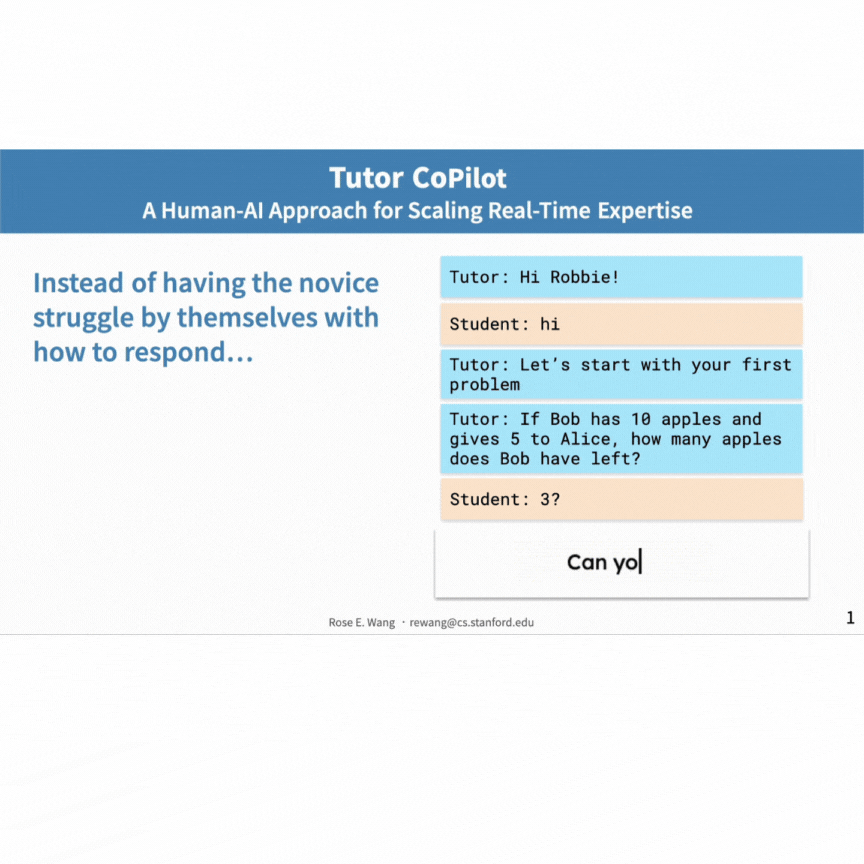

## What this Colab will teach you

This tutorial will guide you through the system setup we used for Tutor CoPilot.

By the end you'll have something like this:

In [ ]:
#@title Helper Code for Rendering

from IPython.core.display import display, HTML

def render_panel(strategies, responses):
  # Create HTML structure for the panel
  html_code = f"""
  <!DOCTYPE html>
  <html lang="en">
  <head>
      <meta charset="UTF-8">
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <link href="https://fonts.googleapis.com/css2?family=Lexend:wght@300;400;700&display=swap" rel="stylesheet">
      <style>
          body {{
              font-family: 'Lexend', sans-serif;
              margin: 0;
              padding: 20px;
              background-color: #f0f0f0;
          }}
          .panel {{
              max-width: 600px;
              margin: 0 auto;
              background-color: white;
              border-radius: 8px;
              overflow: hidden;
              box-shadow: 0 2px 10px rgba(0,0,0,0.1);
          }}
          .header {{
              background-color: #9370DB;
              color: white;
              padding: 10px 15px;
              font-size: 18px;
              font-weight: bold;
              display: flex;
              justify-content: space-between;
              align-items: center;
          }}
          .emoji-container {{
              display: flex;
              gap: 10px;
          }}
          .content {{
              display: flex;
          }}
          .column {{
              flex: 1;
              padding: 15px;
              border-right: 1px solid #e0e0e0;
          }}
          .column:last-child {{
              border-right: none;
          }}
          .column-header {{
              font-weight: bold;
              margin-bottom: 10px;
              font-size: 14px;
          }}
          .column-content {{
              font-size: 12px;
              line-height: 1.4;
          }}
      </style>
  </head>
  <body>
      <div class="panel">
          <div class="header">
              Let's help the student!
              <div class="emoji-container">
                  <span>▼</span>
                  <span>🔄</span>
                  <span>✏️</span>
              </div>
          </div>
          <div class="content">
              <div class="column">
                  <div class="column-header">{strategies[0]}</div>
                  <p>{responses[0]}</p>
              </div>
              <div class="column">
                  <div class="column-header">{strategies[1]}</div>
                  <p>{responses[1]}</p>
              </div>
              <div class="column">
                  <div class="column-header">{strategies[2]}</div>
                  <p>{responses[2]}</p>
              </div>
          </div>
      </div>
  </body>
  </html>
  """

  # Display the panel in the output cell
  display(HTML(html_code))

In [ ]:
#@title Tutor CoPilot demo

strategies = ["Ask a question", "Explain a concept", "Provide a hint"]
responses = [
    "That’s a good try, but let’s try it together. If Bob originally has 10 apples and gives 5 to Alice, we subtract 5 from 10. Can you do the subtraction?",
    "Not quite, this is a subtraction problem. Can you try to identify what we should be subtracting?",
    "Good effort, but let’s first draw the number of apples Bob starts with."
  ]
render_panel(strategies, responses)

## What this Colab won't teach you

This tutorial doesn’t cover integrating Tutor CoPilot directly into a specific platform.
Note that Tutor CoPilot’s effectiveness relies on having immediate access to the conversation or lesson context.

To achieve an effective interaction experience, we conducted pilot studies to ensure that Tutor CoPilot provides quick, relevant guidance; for more information on the pilot studies, check out Appendix A of our paper: https://arxiv.org/pdf/2410.03017.
I also did a lot of model evaluations in our previous work, Bridge (https://arxiv.org/pdf/2310.10648).
These evaluations are important but are out of scope for this Colab tutorial!

# Getting started

Each suggestion generated by Tutor CoPilot comes from a response template developed in our prior work (see template: https://github.com/rosewang2008/bridge/blob/main/prompts/task3_generate_response/gpt4_rFalse.txt).

To customize this template, you’ll need:
- `lesson_topic`: the topic of the current lesson
- `c_h`: the conversation history
- `z`: the specific strategy chosen (e.g., ask a question)

Here's an example template we’ll work with:


In [ ]:
template = """You are an experienced elementary math teacher and you are going to respond to a student's mistake in a useful and caring way.

The problem your student is solving is on topic: {lesson_topic}. In your response, please {z}.
{c_h}
tutor (maximum one sentence):"""

print(template)

You are an experienced elementary math teacher and you are going to respond to a student's mistake in a useful and caring way.

The problem your student is solving is on topic: {lesson_topic}. In your response, please {z}.
{c_h}
tutor (maximum one sentence):


# Handling conversation `c_h`



## Deidentification of `c_h`



To ensure privacy, we’ll de-identify conversation history.
We use Edu-ConvoKit, pip-installable library, to de-identify names and other PII.

Edu-ConvoKit: https://github.com/stanfordnlp/edu-convokit

Here’s an example of how you can use it:



In [ ]:
!pip install edu-convokit

import pandas as pd

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=07f36e27f2f362e8a5500e354e2837bd4048e9b0993a1d687fa931fc4c8abe57
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=086ac5c6db6974c58b167afd246e862c39da594489b4159d0fdb07c2eb407a66
  Stored in directory: /root/.cache

In [ ]:
convo_with_names = [
    {"user": "Charles Junior", "text": "Hi Robbie!"},
    {"user": "Robbie Bobbie", "text": "hi"},
    {"user": "Charles Junior", "text": "Let's start with your first problem"},
    {"user": "Charles Junior", "text": "If Bob has 10 apples and gives 5 to Alice, how many apples does Bob have left?"},
    {"user": "Robbie Bobbie", "text": "3?"}
]
convo_with_names = pd.DataFrame(convo_with_names)
convo_with_names

,user,text
0,Charles Junior,Hi Robbie!
1,Robbie Bobbie,hi
2,Charles Junior,Let's start with your first problem
3,Charles Junior,"If Bob has 10 apples and gives 5 to Alice, how..."
4,Robbie Bobbie,3?


Usually you will have a roster of names of who's who (e.g., from a database). Let's say we've retrieved that now and we want to mask their names with placeholders:



In [ ]:
tutor_name = "Charles Junior"
student_name = "Robbie Bobbie"
known_names = [tutor_name, student_name]

Now let's de-identify both the `user` and `text`.



In [ ]:
from edu_convokit.preprocessors import TextPreprocessor
processor = TextPreprocessor()

def deidentify_names(df, user_column, text_column, names):
  convo_no_names = processor.anonymize_known_names(
      df=df,
      # First let's do the `user` column
      text_column=user_column,
      names=known_names,
      replacement_names=["tutor", "student"],
  )

  # Now let's do the `text` column
  convo_no_names = processor.anonymize_known_names(
      df=df,
      text_column=text_column,
      names=known_names,
      # I'm replacing with this mask so that the replacement is distinct
      replacement_names=["[TUTOR]", "[STUDENT]"],
  )
  return convo_no_names


In [ ]:

convo_no_names = deidentify_names(convo_with_names, "user", "text", known_names)
convo_no_names

,user,text
0,tutor,Hi [STUDENT]!
1,student,hi
2,tutor,Let's start with your first problem
3,tutor,"If Bob has 10 apples and gives 5 to Alice, how..."
4,student,3?


Note: Edu-ConvoKit preserves names that are part of problem content (like "Bob" and "Alice"), which basic entity recognizers might miss.
While not foolproof (e.g., if a student mentions their teacher's name), this step supports privacy best practices in real-time interactions.

Thoughtfully thinking about how to preserve user privacy is important! I'm interested in hearing any feedback or challenges you face in your own use case. :)

## Format conversation

Now that we have de-identified the conversation, we can format the conversation to pass it into the language model.

In [ ]:
def format_conversation(df, user_column, text_column):
  c_h = "\n".join(df.apply(lambda x: f"{x[user_column]}: {x[text_column]}", axis=1))
  return c_h

In [ ]:

c_h = format_conversation(convo_no_names, "user", "text")

print(c_h)

tutor: Hi [STUDENT]!
student: hi
tutor: Let's start with your first problem
tutor: If Bob has 10 apples and gives 5 to Alice, how many apples does Bob have left?
student: 3?


# Strategy `z`

Tutor CoPilot uses expert strategies collected by observing experienced teachers’ thought processes.
For more details, see our prior work: https://arxiv.org/pdf/2310.10648.


The full list of strategies that Tutor CoPilot uses? can be found in our previous project's codebase:

In [ ]:
!curl -o /content/bridge_constants.py https://raw.githubusercontent.com/rosewang2008/bridge/refs/heads/main/scripts/constants.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2980  100  2980    0     0  12899      0 --:--:-- --:--:-- --:--:-- 12956


In [ ]:
from bridge_constants import REVISION_STRATEGIES

REVISION_STRATEGIES

[{'name': 'Explain a concept', 'value': 'explain_concept'},
 {'name': 'Ask a question', 'value': 'ask_question'},
 {'name': 'Provide a hint', 'value': 'provide_hint'},
 {'name': 'Provide a strategy', 'value': 'provide_strategy'},
 {'name': 'Provide a worked example', 'value': 'provide_example'},
 {'name': 'Provide a minor correction', 'value': 'provide_correction'},
 {'name': 'Provide a similar problem', 'value': 'provide_similar_problem'},
 {'name': 'Simplify the question', 'value': 'simplify_question'},
 {'name': 'Affirm the correct answer', 'value': 'affirm_correct_answer'},
 {'name': 'Encourage the student', 'value': 'encourage_student'},
 {'name': 'Other (please specify in textbox)', 'value': 'other'}]

What we're going to do is pick some of these strategies and instruct a language model to generate responses following these strategies for the conversation we de-identified:

## Populate template



In [ ]:
def populate_template(lesson_topic, c_h, z):
  prompt = template.format(
      lesson_topic=lesson_topic,
      c_h=c_h,
      z=z.lower()
  )
  return prompt

In [ ]:
print("BEFORE")
print(template)

print("AFTER")
strategy_name = REVISION_STRATEGIES[0]["name"]
instructions = populate_template(
    lesson_topic="Word Problems",
    c_h=c_h,
    z=strategy_name
)

print(instructions)

BEFORE
You are an experienced elementary math teacher and you are going to respond to a student's mistake in a useful and caring way.

The problem your student is solving is on topic: {lesson_topic}. In your response, please {z}.
{c_h}
tutor (maximum one sentence):
AFTER
You are an experienced elementary math teacher and you are going to respond to a student's mistake in a useful and caring way.

The problem your student is solving is on topic: Word Problems. In your response, please explain a concept.
tutor: Hi [STUDENT]!
student: hi
tutor: Let's start with your first problem
tutor: If Bob has 10 apples and gives 5 to Alice, how many apples does Bob have left?
student: 3?
tutor (maximum one sentence):


Great! Now we can prompt our model with these instructions and do the same for all other strategies.

# Run inference with language model

In our Bridge work, we compared a bunch of different language models available at the time (zero-shot, k-shot, etc with open- and closed source models).
The best model was GPT4 with our instructions, so for this demo I'm going to also be using that model.

**Note:** Later I plan to create a Colab notebook that plays around with different models for interaction settings, in case people are interested in alternatives!

## Add your API key to Colab secrets


You can add your API key to the Colab Secrets manager to securely store it.

1. Open your Google Colab notebook and click on the 🔑 **Secrets** tab in the left panel.
   
   <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>

2. Create a new secret with the name `OPENAI_API_KEY`.
3. Copy/paste your API key into the `Value` input box of `OPENAI_API_KEY`.
4. Toggle the button on the left to allow notebook access to the secret.

## Prompt model

In [ ]:
!pip install openai==1.52.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
edu-convokit 0.4.0 requires openai==0.28, but you have openai 1.52.2 which is incompatible.


In [ ]:
import os
from google.colab import userdata
# Remember to never share your API key!
os.environ["OPENAI_API_KEY"]=userdata.get('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI()

def generate(prompt):
  completion = client.chat.completions.create(
      # Note that in our original work, we used GPT4.
      # There are now many better models so feel free to use others: https://platform.openai.com/docs/models/gpt-4-turbo-and-gpt-4
      model="gpt-4",
      messages=[
          {
              "role": "user",
              "content": prompt
          },
      ],
  )
  return completion.choices[0].message.content


In [ ]:
print(instructions)

You are an experienced elementary math teacher and you are going to respond to a student's mistake in a useful and caring way.

The problem your student is solving is on topic: Word Problems. In your response, please explain a concept.
tutor: Hi [STUDENT]!
student: hi
tutor: Let's start with your first problem
tutor: If Bob has 10 apples and gives 5 to Alice, how many apples does Bob have left?
student: 3?
tutor (maximum one sentence):


In [ ]:
response = generate(instructions)

print(response)

That's a good try, but when we subtract the number of apples Bob gave to Alice (5) from the total number he had initially (10), we get 5, not 3. This is because in subtraction, we take away a certain quantity from another. Remember, subtraction is the reverse of addition.


# Populate response into Tutor CoPilot

Great! Now that we can generate a response for a strategy, let's populate the Tutor CoPilot panel. We're going to use the first three strategies from the Bridge work:

In [ ]:
strategies = [REVISION_STRATEGIES[0]["name"], REVISION_STRATEGIES[1]["name"], REVISION_STRATEGIES[2]["name"]]
print(strategies)

['Explain a concept', 'Ask a question', 'Provide a hint']


In [ ]:
tutor_copilot_responses = []

for strategy in strategies:
  prompt = populate_template(
      lesson_topic="Word Problems",
      c_h=c_h,
      z=strategy
  )
  response = generate(prompt)
  tutor_copilot_responses.append(response)

render_panel(strategies, tutor_copilot_responses)

Nice work :)

# Extra material

In our previous work, we actually released conversation snippets from real-world tutoring sessions. So we can actually run this whole setup on that dataset as well.

In [ ]:
# Download the test set of the data.
!curl -o /content/test.json https://raw.githubusercontent.com/rosewang2008/bridge/refs/heads/main/dataset/test.json

# If you want the entire dataset, check out: https://github.com/rosewang2008/bridge/tree/main

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  509k  100  509k    0     0  1707k      0 --:--:-- --:--:-- --:--:-- 1710k


In [ ]:
# Let me show an example of our dataset
import pandas as pd
df = pd.read_json("/content/test.json")

c_h = df.iloc[0].c_h
c_h = pd.DataFrame(c_h)

# This dataset also has the lesson topic for each conversation!!!
lesson_topic = df.iloc[0].lesson_topic

print(lesson_topic)

print(c_h)



2.8A.2- and 3-Dimensional Shapes
    id                                    text   time     user
0  105                         i meant 5 sides  29:58  student
1  106                           That is okay!  30:09    tutor
2  107  What is the name of the 5 sided shape?  30:43    tutor
3  108                                 hexagon  31:06  student


Neeeat, so now what we can do is put everything we learned and create Tutor CoPilot panels for each conversation.
I already de-identified the conversations in this dataset, so we don't need to worry about that step.

Let's try it on a few examples:

In [ ]:
# Just do it on 3 examples
NUM_EXAMPLES = 3
for i in range(NUM_EXAMPLES):
  tutor_copilot_responses = []
  lesson_topic = df.iloc[i].lesson_topic
  c_h = format_conversation(
    df=pd.DataFrame(df.iloc[i].c_h),
    user_column="user",
    text_column="text")

  for strategy in strategies:
    prompt = populate_template(
        lesson_topic=lesson_topic,
        c_h=c_h,
        z=strategy
    )
    response = generate(prompt)
    tutor_copilot_responses.append(response)

  print(f"Lesson Topic: {lesson_topic}")
  print(c_h)
  render_panel(strategies, tutor_copilot_responses)

Lesson Topic: 2.8A.2- and 3-Dimensional Shapes
student: i meant 5 sides
tutor: That is okay!
tutor: What is the name of the 5 sided shape?
student: hexagon


Lesson Topic: 3.5D.Unknown Numbers in Division
student: ok
tutor: Product of quotient and divisor will get missing dividend.
tutor: Are you still at the computer?
student: no


Lesson Topic: 6.4D.Understanding Unit Rates
student: alright
tutor: There comes our first question.
tutor: What we have to find from this question?
student: the fraction


# Conclusion

Great!! That concludes the overview of Tutor CoPilot.

If you are interested in learning more about this work, feel free to check these additional resources:
- Tutor CoPilot paper: https://arxiv.org/pdf/2410.03017
- Tutor CoPilot codebase: https://github.com/rosewang2008/tutor-copilot
- Tutor CoPilot highlight video: https://www.youtube.com/watch?v=tWZwmHEtaiQ
- Bridge (underlying adaptation method): https://arxiv.org/pdf/2310.10648
- Bridge dataset: https://github.com/rosewang2008/bridge
- Edu-ConvoKit for all your convo needs: https://github.com/stanfordnlp/edu-convokit/



Of course a lot of decisions were made in its design such as:
- the underlying language model
- the de-identification process
- the visual design
- ...

These decisions are important to carefully think through, depending on your use case.
I plan to create another Colab tutorial on the first decision, and walk through my thinking process when picking the right kind of language model to actually deploy.
I am also curious to hear about other people's learnings!!

-Rose E Wang (rewang@cs.stanford.edu)